<a href="https://colab.research.google.com/github/v1docq/ML-projects/blob/master/Movie_Lens_100K_version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Task 1: Exploratory analysis (5 points).

Perform EDA:
- number of users
- number of items
- number of tags
- number of ratings
- summary statistics of number of ratings per user (mean, median, quantiles)
- rating sparcity
- summary statistics of number of tags per use

### Загружаем датасеты

In [0]:
print("Downloading movielens data...")
import zipfile
import urllib.request

urllib.request.urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print("Done. Dataset contains:")
print(zip_ref.read('ml-100k/u.info'))

Done. Dataset contains:
b'943 users\n1682 items\n100000 ratings\n'


In [0]:
# Load each data set (users, movies, and ratings).
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(
    'ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"] + genre_cols

movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

### Предпроцесинг данных.Создание жанровых категорий.

In [0]:
users["user_id"] = users["user_id"].apply(lambda x: float(x))
movies["movie_id"] = movies["movie_id"].apply(lambda x: float(x))
movies["year"] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: float(x))
ratings["user_id"] = ratings["user_id"].apply(lambda x: float(x))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

In [0]:
date = pd.to_datetime(ratings['unix_timestamp']).astype(str)
ratings['date'] = date
ratings.head()

,user_id,movie_id,rating,unix_timestamp,date
0,196.0,242.0,3.0,881250949,1970-01-01 00:00:00.881250949
1,186.0,302.0,3.0,891717742,1970-01-01 00:00:00.891717742
2,22.0,377.0,1.0,878887116,1970-01-01 00:00:00.878887116
3,244.0,51.0,2.0,880606923,1970-01-01 00:00:00.880606923
4,166.0,346.0,1.0,886397596,1970-01-01 00:00:00.886397596


In [0]:
ratings['date'] = [time[:10] for time in ratings['date']]
ratings.drop(['unix_timestamp'], inplace = True, axis = 1)
ratings.head()

,user_id,movie_id,rating,date
0,196.0,242.0,3.0,1970-01-01
1,186.0,302.0,3.0,1970-01-01
2,22.0,377.0,1.0,1970-01-01
3,244.0,51.0,2.0,1970-01-01
4,166.0,346.0,1.0,1970-01-01


In [0]:
#Количество фильмов с установленным жанром
genre_occurences = movies[genre_cols].sum().to_dict()

In [0]:
def mark_genres(movies, genres):
    def get_random_genre(gs):
        active = [genre for genre, g in zip(genres, gs) if g==1]
        if len(active) == 0:
            return 'Other'
        return np.random.choice(active)
    def get_all_genres(gs):
        active = [genre for genre, g in zip(genres, gs) if g==1]
        if len(active) == 0:
            return 'Other'
        return '-'.join(active)
    movies['genre'] = [
        get_random_genre(gs) for gs in zip(*[movies[genre] for genre in genres])]
    movies['all_genres'] = [
        get_all_genres(gs) for gs in zip(*[movies[genre] for genre in genres])]

mark_genres(movies, genre_cols)

In [0]:
df = ratings.merge(movies, on='movie_id').merge(users, on='user_id')

In [0]:
df.drop(['year','release_date','video_release_date','imdb_url', 'age', 'sex', 'occupation','zip_code'], inplace = True, axis = 1)

In [0]:
df.head()

,user_id,movie_id,rating,date,title,genre_unknown,Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre,all_genres
0,196.0,242.0,3.0,1970-01-01,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,Comedy,Comedy
1,196.0,257.0,2.0,1970-01-01,Men in Black (1997),0,1,1,0,0,...,0,0,0,0,1,0,0,0,Comedy,Action-Adventure-Comedy-Sci-Fi
2,196.0,111.0,4.0,1970-01-01,"Truth About Cats & Dogs, The (1996)",0,0,0,0,0,...,0,0,0,1,0,0,0,0,Romance,Comedy-Romance
3,196.0,25.0,4.0,1970-01-01,"Birdcage, The (1996)",0,0,0,0,0,...,0,0,0,0,0,0,0,0,Comedy,Comedy
4,196.0,382.0,4.0,1970-01-01,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,Drama,Comedy-Drama


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 26 columns):
user_id          100000 non-null float64
movie_id         100000 non-null float64
rating           100000 non-null float64
date             100000 non-null object
title            100000 non-null object
genre_unknown    100000 non-null int64
Action           100000 non-null int64
Adventure        100000 non-null int64
Animation        100000 non-null int64
Children         100000 non-null int64
Comedy           100000 non-null int64
Crime            100000 non-null int64
Documentary      100000 non-null int64
Drama            100000 non-null int64
Fantasy          100000 non-null int64
Film-Noir        100000 non-null int64
Horror           100000 non-null int64
Musical          100000 non-null int64
Mystery          100000 non-null int64
Romance          100000 non-null int64
Sci-Fi           100000 non-null int64
Thriller         100000 non-null int64
War              100000 

### Проверяем на наличие пропущенных значений

In [0]:
print ("Number of movies Null values: ", movies.isnull().sum())
print ("Number of ratings Null values: ", ratings.isnull().sum())

Number of movies Null values:  movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
genre_unknown            0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
year                     0
genre                    0
all_genres               0
dtype: int64
Number of ratings Null values:  user_id     0
movie_id    0
rating      0
date        0
dtype: int64


In [0]:
movies.dropna(inplace=True)
print ("Number of movies Null values: ", movies.isnull().sum())

Number of movies Null values:  movie_id              0
title                 0
release_date          0
video_release_date    0
imdb_url              0
genre_unknown         0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
year                  0
genre                 0
all_genres            0
dtype: int64


### Создаем саб-сеты для визуализации

In [0]:
df[df['rating'] >= 4.5]['movie_id'].count() # Фильмы с рейтингом 4,5 или выше

21201

In [0]:
df[df['rating'] >= 4.5]['movie_id'].count() / ratings['rating'].count() # Процент фильмов с рейтингом 4,5 или выше

0.21201

In [0]:
df[df['rating'] == 5]['movie_id'].count() # Фильмы с рейтингом 5

21201

In [0]:
df[df['rating'] == 5]['movie_id'].count() / ratings['rating'].count() # Процент фильмов с рейтингом 5

0.21201

In [0]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head() # Топ фильмов по рейтингу

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [0]:
# количество оценок 
df_RateCount = pd.DataFrame(df.groupby('title', as_index = False)['rating'].agg('count')
                              .rename(columns={'rating' : 'RateCount'}))
df_RateCount.sort_values('RateCount',ascending=False).head(5)

,title,RateCount
1398,Star Wars (1977),583
333,Contact (1997),509
498,Fargo (1996),508
1234,Return of the Jedi (1983),507
860,Liar Liar (1997),485


In [0]:
# средняя оценка фильма
df_RateMean = pd.DataFrame(df.groupby('title', as_index = False)['rating'].agg('mean')
                              .rename(columns={'rating' : 'RateMean'}))
df_RateMean.sort_values('RateMean',ascending=False).head(5)

,title,RateMean
1472,They Made Me a Criminal (1939),5.0
944,Marlene Dietrich: Shadow and Light (1996),5.0
1273,"Saint of Fort Washington, The (1993)",5.0
1359,Someone Else's America (1995),5.0
1387,Star Kid (1997),5.0


In [0]:
# мержим саб-сеты
df_movie_rate = pd.merge(df_RateCount,df_RateMean, on='title')
df_movie_rate.sort_values('RateCount',ascending=False).head(5)

,title,RateCount,RateMean
1398,Star Wars (1977),583,4.358491
333,Contact (1997),509,3.803536
498,Fargo (1996),508,4.155512
1234,Return of the Jedi (1983),507,4.007890
860,Liar Liar (1997),485,3.156701


In [0]:
# распределение оценок по пользователям
df_distrib_of_ratings= pd.DataFrame(ratings.groupby('rating', as_index = False)['user_id'].count()
                         .rename(columns={'user_id' : 'RateCount'}))
df_distrib_of_ratings.head(10)

,rating,RateCount
0,1.0,6110
1,2.0,11370
2,3.0,27145
3,4.0,34174
4,5.0,21201


In [0]:
# the users with most ratings
users_rate = ratings[['user_id', 'movie_id']].groupby('user_id').count()
users_rate = users_rate.rename(columns={'movie_id' : 'Total'})
users_rate.sort_values('Total',ascending=False).head()

,Total
user_id,
405.0,737
655.0,685
13.0,636
450.0,540
276.0,518


In [0]:
# наиболее популярные жанры
MP_genre = df.groupby('genre', as_index = False)['user_id'].count()
MP_genre = MP_genre.rename(columns={'user_id' : 'Total ratings'})
MP_genre.sort_values('Total ratings',ascending=False).head(10)

,genre,Total ratings
7,Drama,24678
4,Comedy,18682
15,Thriller,9436
0,Action,8860
13,Romance,8045
1,Adventure,5515
16,War,3561
14,Sci-Fi,3395
5,Crime,3281
10,Horror,3122


### Визуализация

In [0]:
plt.style.use('ggplot')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Распределение оценок для количества фильмов (минимальное значение 50)

Text(0,0.5,'Количество фильмов')

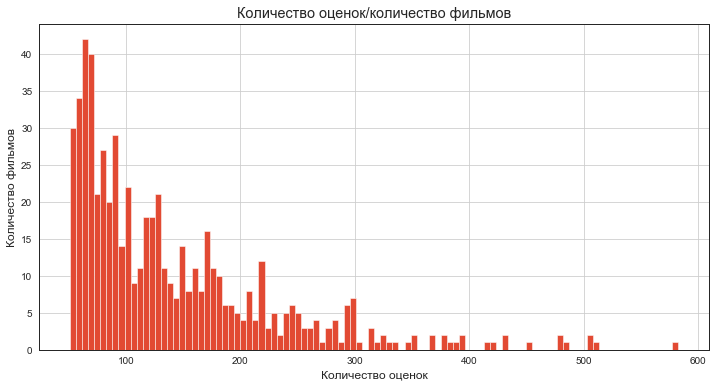

In [0]:
plt.figure(figsize=(12,6))
df_movie_rate[df_movie_rate['RateCount'] > 50]['RateCount'].hist(bins=100)
plt.title('Количество оценок/количество фильмов')
plt.xlabel('Количество оценок')
plt.ylabel('Количество фильмов')

#### Распределение шкалы оценок

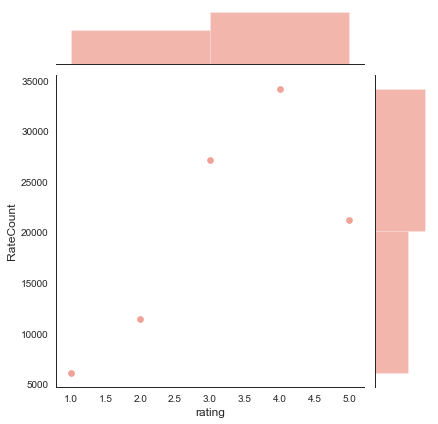

In [0]:
sns.jointplot(x='rating',y='RateCount',data=df_distrib_of_ratings,alpha=0.5)

#### Зависимость количества оценок от средней оценки

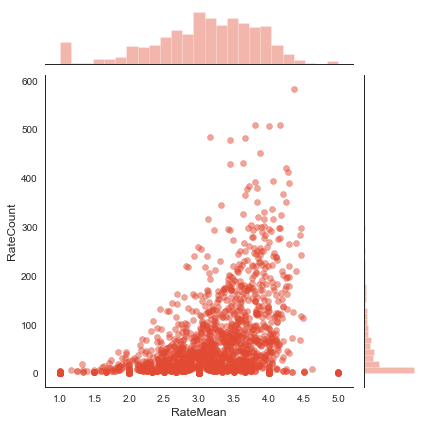

In [0]:
sns.jointplot(x='RateMean',y='RateCount',data= df_movie_rate,alpha=0.5)

#### Количество оценок пользователей

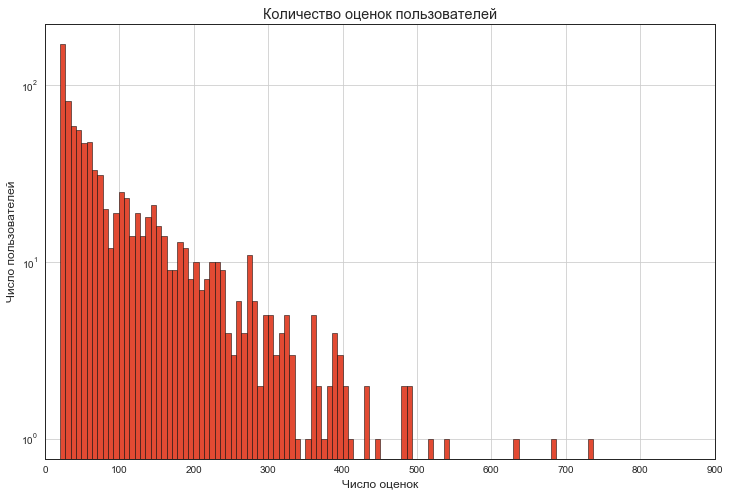

In [0]:
plt.figure(figsize=(12,8))
users_rate['Total'].hist(bins=100, edgecolor='black', log=True)
plt.title('Количество оценок пользователей')
plt.xlabel('Число оценок')
plt.ylabel('Число пользователей')
plt.xlim(0,)
plt.xticks(np.arange(0,1000,100))
plt.show()

Выводы:
1. Большая часть фильмов имеет менее 4000 оценок
2. Пик развиия киноиндустрии пришелся на начало 90-х
3. Большая часть оценок равна или больше 3
4. Большое число оценок завышает рейтинг фильма
5. Большая часть пользователей имеет диапозон от 0 до 200  оценок

### Metrics.Train/test split

Task 2: Evaluation metrics report (5 points)

Implement evaluation metrics to assess recommender performance
- MAP score
- Precision@k
- Mean percentage ranking

### Функция для деления на тест и трейн

In [0]:
def Split_DF(df, holdout_fraction=0.25):
    test = df.sample(frac=holdout_fraction, replace=False, random_state=42)
    train = df[~df.index.isin(test.index)]
    return train, test

### Метрики для оценки качества системы

In [0]:
def precision(actual, predicted, k):
    act_set = set(actual[:k])
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(k)
    return result

def average_precision_at_k(actual, predicted, k=10):

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)


    return score / min(len(actual), k)

def mean_average_precision_at_k(actual, predicted, k=10):

    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

def PR( true_values, pred_values, k):
    for ind, true_values in enumerate(get_true_values_top( true_values, pred_values, k)):
        if true_values > 0:
            return 1.0 / (ind + 1)
    return 0.

## Collaborative filtering based recommenders 

#### Most popular items (MP) recommender

Сделаем систему которая будет предлагать топ-х фильмов, похожих на фильм который предложил пользователь. Так же сделаем отсев по минимальному числу оценок

In [0]:
MP_movie = df.pivot_table(index='user_id',columns='movie_id',values='rating').fillna(0)
MP_movie.head(5)

movie_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1673.0,1674.0,1675.0,1676.0,1677.0,1678.0,1679.0,1680.0,1681.0,1682.0
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Вариант рекомендательной системы по жанрам.
1. 1 шаг- задаем минимальное число просмотров, чтобы понимать что пользователь активен и его вкус формируется каким либо способом.
2. Смотрим на 2 показателя: наибольшое число просмотренных фильмов одного жанра и жанр фильмов с наибольшей оценкой. Если число фильмов с наибольшей оценкой меньше минимального числа просмотренных фильмов то тогда выбираем самый популярный жанр
3. Если число просмотров фильмов одного жанра с наибольшей оценкой то выбираем этот жанр.

In [0]:
class MP_recomender(object):
    def __init__(self, user_id, movie_df,  number_of_ratings, top_similar):
        self.user_id = user_id
        self.movie_df = movie_df
        self.number_of_ratings = number_of_ratings
        self.top_similar = top_similar
    
    def fit(self):
        ratings = pd.DataFrame(self.movie_df[self.movie_df['user_id'] == self.user_id].groupby('genre')['rating'].count()).sort_values('rating', ascending=False)
        user_top = self.movie_df[self.movie_df['user_id'] == self.user_id].groupby('genre', as_index = False)['rating'].agg('mean').sort_values('rating', ascending=False)
        user_top_rate = user_top['genre'].iloc[0]
        user_top_genre = ratings['rating'].iloc[0]
        
        return ratings, user_top, user_top_rate, user_top_genre

    def predict(self, ratings, user_top, user_top_rate, user_top_genre):
        
        if user_top_genre > self.number_of_ratings:
            user_top_genre = ratings['rating'].index[0]
            top_film = self.movie_df[self.movie_df['genre'] == user_top_genre].groupby('movie_id', as_index = False)['rating'].agg('mean').sort_values('rating',ascending=False).head(self.top_similar)
        else:
            user_top_genre = user_top_rate
            top_film = self.movie_df[self.movie_df['genre'] == user_top_rate].groupby('movie_id', as_index = False)['rating'].agg('mean').sort_values('rating',ascending=False).head(self.top_similar)

        print ('Наибольшое чилсо просмотров - {1}  , категория - {0} .'.format(ratings['rating'].index[0], ratings['rating'].iloc[0]))
        print ('Наилучшая средняя оценка- {1}  , категория - {0} .'.format(user_top_rate, user_top['rating'].iloc[0]))
        print ('Предпочитаемый жанр фильмов пользователя с id  №{0} это {1} .'.format(self.user_id,  user_top_genre))
        print ('Предложнено топ-{0} фильмов для просмотра.'.format(self.top_similar))

        return top_film, user_top_genre 

    def MP_recomenders_metrics(self, top_film):
        users = []
        prec = []
        apak = []

        for user in top_film['user_id']:
            top_genre = top_film[top_film['user_id'] == user]['genre'].iloc[0]
            actual = self.movie_df[self.movie_df['genre'] == top_genre ].sort_values('rating',ascending=False)['movie_id'].values[0:self.top_similar]
            preds = top_film[top_film['user_id'] == user]['movie_id'].iloc[0]
            users.append(user)
            prec.append(precision(actual,preds,self.top_similar))
            apak.append(average_precision_at_k(actual,preds,self.top_similar))
        
        df_metrics = pd.DataFrame({'user_id': users,
                               'precission': prec,
                                 'ap@k': apak,}, 
                                columns = ['user_id', 'precission' , 'ap@k'])

        return df_metrics


In [0]:
user_list = df.drop_duplicates( subset=['user_id'], keep='first', inplace=False)

user_list  = user_list['user_id'].values
num_id = []
num_films = []
user_genre = []


for user in user_list:
    MP_pred_test=MP_recomender(user,df,10,5)
    ratings, user_top, user_top_rate, user_top_genre = MP_pred_test.fit()
    predict, user_top_genre  = MP_pred_test.predict(ratings, user_top, user_top_rate, user_top_genre)
    user_genre.append(user_top_genre)
    num_id.append(user)
    num_films.append(predict['movie_id'].values)

Наибольшое чилсо просмотров - 23  , категория - Comedy .
Наилучшая средняя оценка- 4.0  , категория - Documentary .
Предпочитаемый жанр фильмов пользователя с id  №196.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 27  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Documentary .
Предпочитаемый жанр фильмов пользователя с id  №63.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 17  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №226.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 16  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №154.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Comedy .
Наилучшая средняя оценка- 4.2  , категория - Romance .
Предпоч

Наибольшое чилсо просмотров - 137  , категория - Drama .
Наилучшая средняя оценка- 4.5  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №416.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 39  , категория - Drama .
Наилучшая средняя оценка- 4.230769230769231  , категория - Drama .
Предпочитаемый жанр фильмов пользователя с id  №566.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 8  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Musical .
Предпочитаемый жанр фильмов пользователя с id  №597.0 это Musical .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 142  , категория - Drama .
Наилучшая средняя оценка- 2.5  , категория - Musical .
Предпочитаемый жанр фильмов пользователя с id  №181.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 64  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Film-Noir

Наибольшое чилсо просмотров - 10  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №594.0 это Crime .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 11  , категория - Drama .
Наилучшая средняя оценка- 3.25  , категория - Comedy .
Предпочитаемый жанр фильмов пользователя с id  №866.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 9  , категория - Comedy .
Наилучшая средняя оценка- 4.142857142857143  , категория - Drama .
Предпочитаемый жанр фильмов пользователя с id  №803.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 6  , категория - Thriller .
Наилучшая средняя оценка- 5.0  , категория - Comedy .
Предпочитаемый жанр фильмов пользователя с id  №240.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 19  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Musical .
Предп

Наибольшое чилсо просмотров - 18  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №190.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 121  , категория - Comedy .
Наилучшая средняя оценка- 4.5  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №303.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 8  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Musical .
Предпочитаемый жанр фильмов пользователя с id  №31.0 это Musical .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 56  , категория - Drama .
Наилучшая средняя оценка- 4.333333333333333  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №178.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 43  , категория - Comedy .
Наилучшая средняя оценка- 3.5  , категория - Wes

Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 16  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Sci-Fi .
Предпочитаемый жанр фильмов пользователя с id  №179.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 8  , категория - Thriller .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №362.0 это Film-Noir .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 55  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №10.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 43  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №297.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 44  , категория - Action .
Наилучшая средняя оценка- 5.

Наибольшое чилсо просмотров - 6  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №570.0 это Film-Noir .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 6  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №105.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 11  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №555.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 44  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Western .
Предпочитаемый жанр фильмов пользователя с id  №548.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 5  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочит

Наибольшое чилсо просмотров - 76  , категория - Drama .
Наилучшая средняя оценка- 4.3125  , категория - War .
Предпочитаемый жанр фильмов пользователя с id  №328.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 52  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №828.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 39  , категория - Drama .
Наилучшая средняя оценка- 3.0  , категория - Children .
Предпочитаемый жанр фильмов пользователя с id  №445.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 18  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №329.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 18  , категория - Drama .
Наилучшая средняя оценка- 4.75  , категория - Children .
Предпочитае

Наибольшое чилсо просмотров - 7  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №920.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 12  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Adventure .
Предпочитаемый жанр фильмов пользователя с id  №657.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 10  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №819.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №905.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 19  , категория - Drama .
Наилучшая средняя оценка- 4.5  , категория - Animation .
Предпочитаем

Наибольшое чилсо просмотров - 7  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №39.0 это Film-Noir .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 56  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №380.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 15  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №836.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 6  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №781.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 27  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Animation .
Предпочитаем

Наибольшое чилсо просмотров - 11  , категория - Action .
Наилучшая средняя оценка- 5.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №137.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 65  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Mystery .
Предпочитаемый жанр фильмов пользователя с id  №224.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 39  , категория - Drama .
Наилучшая средняя оценка- 4.285714285714286  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №72.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 50  , категория - Comedy .
Наилучшая средняя оценка- 4.0  , категория - Horror .
Предпочитаемый жанр фильмов пользователя с id  №11.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 106  , категория - Drama .
Наилучшая средняя оценка- 4.625  , категория - Crime .
Пред

Наибольшое чилсо просмотров - 31  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №288.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 7  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - War .
Предпочитаемый жанр фильмов пользователя с id  №133.0 это War .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 7  , категория - Thriller .
Наилучшая средняя оценка- 5.0  , категория - Romance .
Предпочитаемый жанр фильмов пользователя с id  №511.0 это Romance .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Horror .
Наилучшая средняя оценка- 5.0  , категория - Sci-Fi .
Предпочитаемый жанр фильмов пользователя с id  №546.0 это Horror .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 84  , категория - Drama .
Наилучшая средняя оценка- 4.4  , категория - Animation .
Предпочитаемый жанр

Наибольшое чилсо просмотров - 29  , категория - Drama .
Наилучшая средняя оценка- 4.181818181818182  , категория - Sci-Fi .
Предпочитаемый жанр фильмов пользователя с id  №44.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 37  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №267.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 61  , категория - Drama .
Наилучшая средняя оценка- 4.714285714285714  , категория - Sci-Fi .
Предпочитаемый жанр фильмов пользователя с id  №189.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 68  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №312.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 54  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категори

Наибольшое чилсо просмотров - 31  , категория - Action .
Наилучшая средняя оценка- 3.7142857142857144  , категория - Adventure .
Предпочитаемый жанр фильмов пользователя с id  №757.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 40  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Fantasy .
Предпочитаемый жанр фильмов пользователя с id  №843.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 73  , категория - Drama .
Наилучшая средняя оценка- 4.125  , категория - Mystery .
Предпочитаемый жанр фильмов пользователя с id  №796.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 21  , категория - Action .
Наилучшая средняя оценка- 4.25  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №738.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 39  , категория - Comedy .
Наилучшая средняя оценка- 3.696969696969697  

Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 50  , категория - Comedy .
Наилучшая средняя оценка- 4.0  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №407.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 46  , категория - Comedy .
Наилучшая средняя оценка- 3.857142857142857  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №622.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Adventure .
Наилучшая средняя оценка- 4.0  , категория - Romance .
Предпочитаемый жанр фильмов пользователя с id  №275.0 это Adventure .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 33  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №200.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 46  , категория - Comedy .
На

Наибольшое чилсо просмотров - 43  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Children .
Предпочитаемый жанр фильмов пользователя с id  №629.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 40  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Documentary .
Предпочитаемый жанр фильмов пользователя с id  №577.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 42  , категория - Drama .
Наилучшая средняя оценка- 4.4  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №436.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Action .
Наилучшая средняя оценка- 5.0  , категория - Musical .
Предпочитаемый жанр фильмов пользователя с id  №638.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 26  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - War .
Предпочитаемый

Наибольшое чилсо просмотров - 42  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Adventure .
Предпочитаемый жанр фильмов пользователя с id  №835.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 41  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Film-Noir .
Предпочитаемый жанр фильмов пользователя с id  №887.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 19  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Sci-Fi .
Предпочитаемый жанр фильмов пользователя с id  №167.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 33  , категория - Comedy .
Наилучшая средняя оценка- 4.4  , категория - Thriller .
Предпочитаемый жанр фильмов пользователя с id  №159.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 53  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Musical .
Предпочит

Наибольшое чилсо просмотров - 28  , категория - Drama .
Наилучшая средняя оценка- 4.333333333333333  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №257.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 25  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - War .
Предпочитаемый жанр фильмов пользователя с id  №829.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 33  , категория - Drama .
Наилучшая средняя оценка- 4.333333333333333  , категория - War .
Предпочитаемый жанр фильмов пользователя с id  №661.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 22  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №565.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 26  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Adventure

Наибольшое чилсо просмотров - 5  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Adventure .
Предпочитаемый жанр фильмов пользователя с id  №736.0 это Adventure .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Mystery .
Предпочитаемый жанр фильмов пользователя с id  №701.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 16  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Children .
Предпочитаемый жанр фильмов пользователя с id  №839.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 11  , категория - Action .
Наилучшая средняя оценка- 5.0  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №852.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Comedy .
Наилучшая средняя оценка- 4.666666666666667  , категория - Cr

Наибольшое чилсо просмотров - 8  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №219.0 это Animation .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 17  , категория - Comedy .
Наилучшая средняя оценка- 4.25  , категория - Romance .
Предпочитаемый жанр фильмов пользователя с id  №599.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 17  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Horror .
Предпочитаемый жанр фильмов пользователя с id  №761.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 13  , категория - Drama .
Наилучшая средняя оценка- 4.3076923076923075  , категория - Drama .
Предпочитаемый жанр фильмов пользователя с id  №917.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 22  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Mystery

Наибольшое чилсо просмотров - 5  , категория - Action .
Наилучшая средняя оценка- 4.333333333333333  , категория - Romance .
Предпочитаемый жанр фильмов пользователя с id  №596.0 это Romance .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 11  , категория - Action .
Наилучшая средняя оценка- 4.0  , категория - Children .
Предпочитаемый жанр фильмов пользователя с id  №817.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 29  , категория - Comedy .
Наилучшая средняя оценка- 4.222222222222222  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №708.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 12  , категория - Drama .
Наилучшая средняя оценка- 4.0  , категория - Adventure .
Предпочитаемый жанр фильмов пользователя с id  №17.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 63  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , кат

Наибольшое чилсо просмотров - 9  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Children .
Предпочитаемый жанр фильмов пользователя с id  №252.0 это Children .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 26  , категория - Comedy .
Наилучшая средняя оценка- 4.0  , категория - Animation .
Предпочитаемый жанр фильмов пользователя с id  №579.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 5  , категория - Action .
Наилучшая средняя оценка- 4.666666666666667  , категория - Drama .
Предпочитаемый жанр фильмов пользователя с id  №231.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 6  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Children .
Предпочитаемый жанр фильмов пользователя с id  №441.0 это Children .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 16  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Chil

Наибольшое чилсо просмотров - 5  , категория - Comedy .
Наилучшая средняя оценка- 4.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №400.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 6  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - War .
Предпочитаемый жанр фильмов пользователя с id  №281.0 это War .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 6  , категория - Thriller .
Наилучшая средняя оценка- 4.333333333333333  , категория - Drama .
Предпочитаемый жанр фильмов пользователя с id  №170.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 7  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Musical .
Предпочитаемый жанр фильмов пользователя с id  №681.0 это Musical .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 7  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Action .
Предпочит

Наибольшое чилсо просмотров - 5  , категория - Romance .
Наилучшая средняя оценка- 3.6666666666666665  , категория - Drama .
Предпочитаемый жанр фильмов пользователя с id  №832.0 это Drama .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 7  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Adventure .
Предпочитаемый жанр фильмов пользователя с id  №143.0 это Adventure .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 14  , категория - Comedy .
Наилучшая средняя оценка- 4.0  , категория - Crime .
Предпочитаемый жанр фильмов пользователя с id  №672.0 это Comedy .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 7  , категория - Comedy .
Наилучшая средняя оценка- 5.0  , категория - Action .
Предпочитаемый жанр фильмов пользователя с id  №341.0 это Action .
Предложнено топ-5 фильмов для просмотра.
Наибольшое чилсо просмотров - 4  , категория - Drama .
Наилучшая средняя оценка- 5.0  , категория - Action .


In [0]:
df_preds = pd.DataFrame({'user_id': num_id,
                        'movie_id': num_films,
                        'genre': user_genre}, 
                                columns = ['user_id','movie_id', 'genre'])

In [0]:
MP_predictions = MP_pred_test.MP_recomenders_metrics(df_preds)
MP = MP_predictions['precission'].mean()
MAPAK = MP_predictions['ap@k'].mean()

In [0]:
MP

0.09819724284199388

In [0]:
MAPAK

0.0688865323435844

#### 0,1- mean precission и чуть меньше MAP@K. В целом рекомендер может посоветовать 1 фильм из 10 который пользователь не смотрел и фильм будет жанровый и хорошего качества

### Matrix factorization

## SVD factorization

#### Collaborative filtering using sklearn surprise lib

In [0]:
#!pip install scikit-surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [0]:
class Matrix_Recomender(object):
    def __init__(self, user_id, movie_df):
        self.user_id = user_id
        self.movie_df = movie_df
    
   
    
    def preprocessing(self, item_clicks, user_clicks):
        self.movie_df = self.movie_df.iloc[:,0:5]
        
        min_item_clicks = item_clicks
        filter_items = self.movie_df ['movie_id'].value_counts() > min_item_clicks
        filter_items = filter_items[filter_items].index.tolist()

        min_user_clicks = item_clicks
        filter_users = self.movie_df ['user_id'].value_counts() > min_user_clicks
        filter_users = filter_users[filter_users].index.tolist()

        df_filtered = self.movie_df [(self.movie_df ['movie_id'].isin(filter_items)) & (self.movie_df ['user_id'].isin(filter_users))]
        data =  df_filtered.sort_values(['date'])

        print('Размер оригинального сета:\t{}'.format(self.movie_df.shape))
        print('Размер очищенного сета:\t{}'.format(df_filtered.shape))
        
        return data
      
    def reader (self, data):
        reader = Reader(rating_scale=(1, 5))
        sup_data = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], reader)
        
        return sup_data
        
    def best_of_algo(self,data):
        benchmark = []

        for algo in [SVD(),SVDpp(), KNNBaseline(), KNNBasic(), BaselineOnly(), NormalPredictor(), CoClustering()]:

            print('Начало кросс-валидации для {}'.format(algo))
            results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

            tmp = pd.DataFrame.from_dict(results).mean(axis=0)
            tmp = tmp.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algorithm']))
            benchmark.append(tmp)
            
        surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
        
        return surprise_results

    def GS(self, algo_name, param_grid, metrics, folds, data):
        

        gs = GridSearchCV(algo_name, param_grid, measures = metrics,  cv = folds)
        
        gs.fit(data)

        # best RMSE score
        print(gs.best_score['rmse'])

        # combination of parameters that gave the best RMSE score
        print(gs.best_params['rmse'])
        
        return gs.best_params['rmse']
        
        
    def split(self, data):

        trainset, testset = train_test_split(data, test_size=0.25)
        
        
        return trainset, testset
    
    def fit(self, best_algo_name, params, train, test):

        algo = best_algo_name(n_factors = params[0],  
                   n_epochs = params[1], 
                   lr_all = params[2], 
                   reg_all = params[3])
        
        predictions = algo.fit(train).test(test)
        
        print(accuracy.rmse(predictions))
        
        return predictions
    
    
  
    
    def predict(self, best_algo_name, params):
        data = Dataset.load_builtin('ml-100k')
        trainset = data.build_full_trainset() 
        
        algo = best_algo_name(n_factors = params[0],  
                   n_epochs = params[1], 
                   lr_all = params[2], 
                   reg_all = params[3])
        
        algo.fit(trainset)

        testset = trainset.build_anti_testset()

        predictions = algo.test(testset)
        
        return predictions
    
    def get_all_predictions(self, predictions):

        top_n = defaultdict(list)    
        for uid, iid, true_r, est, _ in predictions:
            top_n[uid].append((iid, est))

        # Then sort the predictions for each user
        for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)

        return top_n
    
    
    def get_all_predictions_at_k(self, all_pred, k):

        for uid, user_ratings in all_pred.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            all_pred[uid] = user_ratings[:k]
        
        
        tmp = pd.DataFrame.from_dict(all_pred)
        tmp_transpose = tmp
        
        return tmp_transpose
        
    def get_predictions_for_user_at_k(self, tmp_transpose, k):
        
        recommended_movie_ids=[]
        
        results = tmp_transpose['' + str(self.user_id)]
        
        for x in range(0, k):
            recommended_movie_ids.append(results[x][0])

        return results, recommended_movie_ids
    
    
    def get_movies_names(self, recommended_movie_ids):
    
        # шаг первый мы получаем всех юзеров которым понравились топ-к рекомендаций нашего юзера
        recommended_movies = self.movie_df[self.movie_df['movie_id'].isin(recommended_movie_ids)]
        # шаг второй получаем вектор фильмов нашего юзера по рейтингу c рейтингом не менее 3,5
        temp = self.movie_df[(self.movie_df['user_id'] == self.user_id) & (self.movie_df['rating'] > 3.5)].sort_values("rating", ascending = False)
        # шаг третий получаем вектор фильмов юзеров которые совпадают с нашим юзером
        users_history = self.movie_df[self.movie_df['movie_id'].isin(temp['movie_id'])]
        # шаг четвертый получаем юзеров которые совпадают с нашим юзером во вкусах и смотрели рекомендованные ему фильмы
        users_history = users_history[users_history['user_id'].isin(recommended_movies['user_id'].values) ].sort_values('rating', ascending=False)
        # шаг пятый получаем по просмотрам похожих на нашего пользователя людей. логика в том что если они активны
        #  и они имеют схожий вектор вкусов, то скорее всего это эксперты в своем жанре
        top_sim_users = users_history['user_id'].value_counts().iloc[0:3].index.to_list()
        # шаг шестой получаем топ фильмов от ценителей жанра
        users_history = users_history[users_history['user_id'].isin(top_sim_users) & (users_history['rating'] > 3.5)].sort_values('rating', ascending=False)

        return recommended_movies, temp, users_history
    
   
    
    def precision_recall_at_k(self, predictions, k, threshold):
        '''Return precision and recall at k metrics for each user.'''

        # First map the predictions to each user.
        user_est_true = defaultdict(list)
        for uid, _, true_r, est, _ in predictions:
            user_est_true[uid].append((est, true_r))

        precisions = dict()
        recalls = dict()
        for uid, user_ratings in user_est_true.items():

            
            user_ratings.sort(key=lambda x: x[0], reverse=True)

           
            n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

            
            n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

            
            n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                                  for (est, true_r) in user_ratings[:k])

            
            precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

            
            recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

        return precisions, recalls
    



In [0]:
SVD_recomender = Matrix_Recomender(47,df)

In [0]:
new_df = SVD_recomender.preprocessing(10,10)

Размер оригинального сета:	(100000, 5)
Размер очищенного сета:	(97623, 5)


In [0]:
sup_data = SVD_recomender.reader(new_df)

In [0]:
best = SVD_recomender.best_of_algo(sup_data)

Начало кросс-валидации для <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000023752715BA8>
Начало кросс-валидации для <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x0000023752715A20>
Начало кросс-валидации для <surprise.prediction_algorithms.knns.KNNBaseline object at 0x0000023752715B38>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Начало кросс-валидации для <surprise.prediction_algorithms.knns.KNNBasic object at 0x0000023752715748>
Computing the msd similarity matrix...
Do

In [0]:
best

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.915544,159.450460,3.500404
KNNBaseline,0.925539,0.848806,4.396553
SVD,0.934257,4.811582,0.152186
BaselineOnly,0.940344,0.256989,0.089771
CoClustering,0.951380,2.031077,0.096525
KNNBasic,0.966960,0.593215,4.914918
NormalPredictor,1.507112,0.122671,0.133870


#### Как видно первые три места делят SVDpp KNN и SVD
- почему следует выбрать SVD:
- Время на обучение у SVDpp самое большое и отклик у SVDpp тоже довольно долгий. В условиях когда у нас будет большой поток
  обращения к алгоритму, например через API, это может привести к зависаниям и сбою системы.
- Время на обучение у KNN самое маленькое в призовой тройке,а отклик самый долгий. Отметаем по той же причине.
- SVD хоть и учится сравнительно дольше , но в десятки раз быстрее выдает предсказания. Выбираем свд

In [0]:
param_grid = {'n_factors':[20,40,80,120,160,200,240], 
              'n_epochs': [10,15,20,40,60,80,100], 
              'lr_all': [0.002, 0.004, 0.006, 0.008 , 0.01, 0.012, 0.015],
              'reg_all': [0.2, 0.4, 0.6, 0.8, 0.1, 0.12, 0.15]}
metrics=['rmse', 'mae']
folds = 5

In [0]:
gs = SVD_recomender.GS(SVD,param_grid,metrics,folds,sup_data)

In [0]:
#gs best_params = [220, 100, 0.01, 0.2]

In [0]:
trainset,testset = SVD_recomender.split(sup_data)

In [0]:
best_params = [220, 100, 0.01, 0.2]

In [0]:
predictions = SVD_recomender.fit(SVD, best_params, trainset, testset)

RMSE: 0.9237
0.9237198826708052


#### Попробуем подобрать лучшее k для нашего алгоритма. Вычислим recall и  precision для каждого уровня оценок

In [0]:
#Вычислим метрики для каждого уровня оценки от 0-5

final = []

for threshold in np.arange(0, 5.5, 0.5):
  tp=0
  fn=0
  fp=0
  tn=0
  temp = []

  for uid, _, true_r, est, _ in predictions:
    if(true_r>=threshold):
      if(est>=threshold):
        tp = tp+1
      else:
        fn = fn+1
    else:
      if(est>=threshold):
        fp = fp+1
      else:
        tn = tn+1   

    if tp == 0:
      precision = 0
      recall = 0
      f1 = 0
    else:
      precision = tp / (tp + fp)
      recall = tp / (tp + fn)
      f1 = 2 * (precision * recall) / (precision + recall)  

  temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
  final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0.0,24406,0,0,0,1.000000,1.000000,1.000000
1,0.5,24406,0,0,0,1.000000,1.000000,1.000000
2,1.0,24406,0,0,0,1.000000,1.000000,1.000000
3,1.5,23043,1340,20,3,0.945044,0.999870,0.971684
4,2.0,22975,1232,128,71,0.949106,0.996919,0.972425
5,2.5,20029,3424,691,262,0.854006,0.987088,0.915737
6,3.0,18477,2249,1866,1814,0.891489,0.910601,0.900944
7,3.5,10464,3714,7004,3224,0.738045,0.764465,0.751023
8,4.0,4298,655,10063,9390,0.867757,0.313998,0.461134
9,4.5,375,126,18979,4926,0.748503,0.070741,0.129266


#### наиболее оптимальным является уровень равный 3,5. Это значит что мы будем рекомендовать фильм если его ожидаемая оценка не меньше 3,5

In [0]:
from collections import defaultdict

In [0]:
results=[]

for i in range(2, 11):
    precisions, recalls = SVD_recomender.precision_recall_at_k(predictions, k=i, threshold=3.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.8306794055201698, 'Recall': 0.21200328352150175},
 {'K': 3, 'Precision': 0.822717622080678, 'Recall': 0.2800661038430723},
 {'K': 4, 'Precision': 0.8099787685774948, 'Recall': 0.3346680822161416},
 {'K': 5, 'Precision': 0.8019108280254776, 'Recall': 0.383417139326392},
 {'K': 6, 'Precision': 0.7951521585279557, 'Recall': 0.4241961510409385},
 {'K': 7, 'Precision': 0.7904509149732071, 'Recall': 0.45977350021646934},
 {'K': 8, 'Precision': 0.7852567991103026, 'Recall': 0.48829043623895263},
 {'K': 9, 'Precision': 0.7798162470933193, 'Recall': 0.5120550049144569},
 {'K': 10, 'Precision': 0.775935614868736, 'Recall': 0.5333877425204281}]

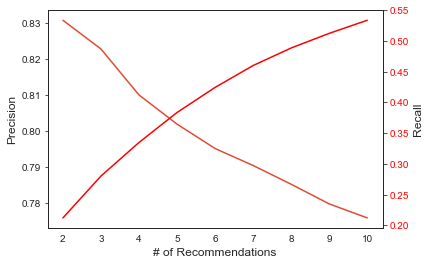

In [0]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')

#### выбираем к = 5

In [0]:
predictions = SVD_recomender.predict(SVD, best_params)

In [0]:
all_pred = SVD_recomender.get_all_predictions(predictions)

In [0]:
all_pred_at_k = SVD_recomender.get_all_predictions_at_k(all_pred, 5)

In [0]:
results, recommended_movie_ids = SVD_recomender.get_predictions_for_user_at_k(all_pred_at_k, 5)

In [0]:
results

0     (1500, 4.771318772870804)
1     (1536, 4.742193243862564)
2      (1449, 4.73966875167993)
3     (1467, 4.711663676677855)
4    (1642, 4.6565738045509635)
Name: 47, dtype: object

In [0]:
recommended_movie_ids

['1500', '1536', '1449', '1467', '1642']

In [0]:
recommended_movies, user_top, predicted_top = SVD_recomender.get_movies_names(recommended_movie_ids)

#### в этой таблице у нас все юзеры которые оценили топ-к предложенных фильмов для нашего юзера. Как видно у нас 15 людей которые оценили предложенные фильмы на 4 или выше

In [0]:
recommended_movies

,user_id,movie_id,rating,date,title,genre_unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre,all_genres,genre_le
2348,234.0,1449.0,4.0,1970-01-01,Pather Panchali (1955),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
10480,655.0,1642.0,4.0,1970-01-01,Some Mother's Son (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
13385,279.0,1500.0,5.0,1970-01-01,Santa with Muscles (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,Comedy,Comedy,4
13708,707.0,1642.0,5.0,1970-01-01,Some Mother's Son (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
25607,561.0,1449.0,5.0,1970-01-01,Pather Panchali (1955),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
36762,934.0,1449.0,5.0,1970-01-01,Pather Panchali (1955),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
40448,380.0,1449.0,4.0,1970-01-01,Pather Panchali (1955),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
40541,781.0,1500.0,5.0,1970-01-01,Santa with Muscles (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,Comedy,Comedy,4
44150,244.0,1467.0,5.0,1970-01-01,"Saint of Fort Washington, The (1993)",0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
54722,385.0,1449.0,4.0,1970-01-01,Pather Panchali (1955),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7


#### это  персональный топ юзера

In [0]:
user_top.head()

,user_id,movie_id,rating,date,title,genre_unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre,all_genres,genre_le
17962,47.0,302.0,5.0,1970-01-01,L.A. Confidential (1997),0,0,0,0,0,...,0,1,0,0,1,0,0,Film-Noir,Crime-Film-Noir-Mystery-Thriller,9
17974,47.0,305.0,5.0,1970-01-01,"Ice Storm, The (1997)",0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
17985,47.0,340.0,5.0,1970-01-01,Boogie Nights (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
17986,47.0,262.0,5.0,1970-01-01,In the Company of Men (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
17964,47.0,327.0,4.0,1970-01-01,Cop Land (1997),0,0,0,0,0,...,0,1,0,0,0,0,0,Mystery,Crime-Drama-Mystery,12


### Bonus task (эксперементальная часть)

Implement a class to return a given number of recommendations for a given user
- get user and item vectors via matrix factorization
- use kd-tree from sklearn.neighbors to implement nearest neighbor search of recommender items for a given user vector
- run performance test to compare the speed of kd-tree implementation versus naive brute force search
(e.g. query top-10 items for 100 users, repeat simulations several times and plot query execution time summary statistics)

#### В чем идея:
- шаг первый мы получаем всех юзеров которым понравились топ-к рекомендаций нашего юзера.
- шаг второй получаем вектор фильмов нашего юзера по рейтингу c рейтингом не менее 3,5.
- шаг третий получаем вектор фильмов юзеров которые совпадают с нашим юзером.
- шаг четвертый получаем юзеров которые совпадают с нашим юзером во вкусах и смотрели рекомендованные ему фильмы.
- шаг пятый получаем по просмотрам похожих на нашего пользователя людей. логика в том что если они активны.
  и они имеют схожий вектор вкусов, то скорее всего это эксперты в своем жанре.
- шаг шестой получаем топ фильмов от ценителей жанра.
- сделано все без кд-дерева, в функции get_movies_names

In [0]:
predicted_top

,user_id,movie_id,rating,date,title,genre_unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre,all_genres,genre_le
10285,655.0,262.0,5.0,1970-01-01,In the Company of Men (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
40500,781.0,302.0,5.0,1970-01-01,L.A. Confidential (1997),0,0,0,0,0,...,0,1,0,0,1,0,0,Film-Noir,Crime-Film-Noir-Mystery-Thriller,9
9826,655.0,302.0,4.0,1970-01-01,L.A. Confidential (1997),0,0,0,0,0,...,0,1,0,0,1,0,0,Film-Noir,Crime-Film-Noir-Mystery-Thriller,9
2111,234.0,292.0,4.0,1970-01-01,Rosewood (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
40502,781.0,327.0,4.0,1970-01-01,Cop Land (1997),0,0,0,0,0,...,0,1,0,0,0,0,0,Mystery,Crime-Drama-Mystery,12
2091,234.0,289.0,4.0,1970-01-01,Evita (1996),0,0,0,0,0,...,1,0,0,0,0,0,0,Musical,Drama-Musical,11
9982,655.0,303.0,4.0,1970-01-01,Ulee's Gold (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
10044,655.0,305.0,4.0,1970-01-01,"Ice Storm, The (1997)",0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7


In [0]:
precision(user_top['movie_id'].values, predicted_top['movie_id'].values, 8)

0.5

In [0]:
average_precision_at_k(user_top['movie_id'].values, predicted_top['movie_id'].values, 8)

0.7644345238095237

То есть наш юзер довольно хорошо совпадает в оценках с топ-3 ближайших к нему по вкусу товарищей. Плюс они оценил рекомендованные ему 4 фильма на на четвреку и выше. Вывод - на них можно и нужно оринтироваться

### Эксперименты с метриками.

In [0]:
import recmetrics

In [0]:
test = pd.DataFrame(predictions)
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'movieId', 'actual', 'cf_predictions']
test.head()

,userId,movieId,actual,cf_predictions
0,196,302,3.52986,4.059568
1,196,377,3.52986,2.456802
2,196,51,3.52986,3.465412
3,196,346,3.52986,3.606528
4,196,474,3.52986,4.097398


In [0]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [0]:
cf_model = test.pivot_table(index='userId', columns='movieId', values='cf_predictions').fillna(0)
test = test.copy().groupby('userId')['movieId'].agg({'actual': (lambda x: list(set(x)))})
recs = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 5, cf_model)
    recs.append(cf_predictions)
        
test['cf_predictions'] = recs
test.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,actual,cf_predictions
userId,,
1,"[411, 329, 1394, 369, 460, 971, 683, 489, 711,...","[1536, 1500, 1449, 1467, 1642]"
10,"[24, 411, 329, 1394, 369, 460, 971, 683, 934, ...","[1467, 1449, 1500, 1642, 1536]"
100,"[24, 411, 4, 329, 1394, 369, 460, 971, 683, 48...","[1500, 1467, 1449, 1642, 814]"
101,"[4, 329, 1394, 460, 971, 683, 489, 711, 934, 3...","[1467, 1449, 1500, 1642, 814]"
102,"[24, 329, 1394, 369, 460, 971, 683, 489, 711, ...","[1467, 1449, 1500, 1642, 1536]"


#### Рекомендер,который советует всем просто топ-к популярных фильмов

In [0]:
popularity_recs = ratings['movie_id'].value_counts().head(5).index.tolist()
recs = []
for user in test.index:
    pop_predictions = popularity_recs
    recs.append(pop_predictions)
        
test['pop_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions
userId,,,
1,"[411, 329, 1394, 369, 460, 971, 683, 489, 711,...","[1536, 1500, 1449, 1467, 1642]","[50.0, 258.0, 100.0, 181.0, 294.0]"
10,"[24, 411, 329, 1394, 369, 460, 971, 683, 934, ...","[1467, 1449, 1500, 1642, 1536]","[50.0, 258.0, 100.0, 181.0, 294.0]"
100,"[24, 411, 4, 329, 1394, 369, 460, 971, 683, 48...","[1500, 1467, 1449, 1642, 814]","[50.0, 258.0, 100.0, 181.0, 294.0]"
101,"[4, 329, 1394, 460, 971, 683, 489, 711, 934, 3...","[1467, 1449, 1500, 1642, 814]","[50.0, 258.0, 100.0, 181.0, 294.0]"
102,"[24, 329, 1394, 369, 460, 971, 683, 489, 711, ...","[1467, 1449, 1500, 1642, 1536]","[50.0, 258.0, 100.0, 181.0, 294.0]"


#### Рекомендер,который советует рандомные топ-к  фильмов

In [0]:
recs = []
for user in test.index:
    random_predictions = ratings['movie_id'].sample(5).values.tolist()
    recs.append(random_predictions)
        
test['random_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions,random_predictions
userId,,,,
1,"[411, 329, 1394, 369, 460, 971, 683, 489, 711,...","[1536, 1500, 1449, 1467, 1642]","[50.0, 258.0, 100.0, 181.0, 294.0]","[180.0, 554.0, 185.0, 627.0, 504.0]"
10,"[24, 411, 329, 1394, 369, 460, 971, 683, 934, ...","[1467, 1449, 1500, 1642, 1536]","[50.0, 258.0, 100.0, 181.0, 294.0]","[480.0, 180.0, 728.0, 300.0, 737.0]"
100,"[24, 411, 4, 329, 1394, 369, 460, 971, 683, 48...","[1500, 1467, 1449, 1642, 814]","[50.0, 258.0, 100.0, 181.0, 294.0]","[1012.0, 222.0, 191.0, 1620.0, 327.0]"
101,"[4, 329, 1394, 460, 971, 683, 489, 711, 934, 3...","[1467, 1449, 1500, 1642, 814]","[50.0, 258.0, 100.0, 181.0, 294.0]","[566.0, 81.0, 343.0, 841.0, 471.0]"
102,"[24, 329, 1394, 369, 460, 971, 683, 489, 711, ...","[1467, 1449, 1500, 1642, 1536]","[50.0, 258.0, 100.0, 181.0, 294.0]","[181.0, 790.0, 1221.0, 176.0, 1042.0]"


In [0]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

In [0]:
pop_mark = []
for K in np.arange(1, 6):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.0, 0.0, 0.0, 0.0, 0.0]

In [0]:
random_mark = []
for K in np.arange(1, 6):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.0, 0.0, 0.0, 0.0, 0.0]

In [0]:
cf_mark = []
for K in np.arange(1, 6):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.0006375686683190499,
 0.0012751373366380997,
 0.0019127060049571496,
 0.0025502746732761995,
 0.003187843341595249]

In [0]:
mp_mark = []
for K in np.arange(1, 6):
    mp_mark.extend([recmetrics.mark(actual, MP_predictions, k=K)])
mp_mark

[0.0, 0.0, 0.0, 0.0, 0.0]

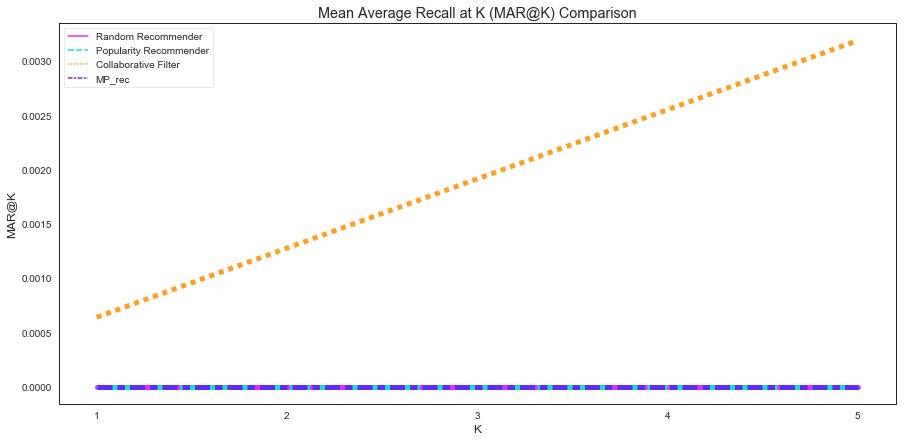

In [0]:
mark_scores = [random_mark, pop_mark, cf_mark, mp_mark]
index = range(1,5+1)
names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter', 'MP_rec']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

In [0]:
test.head()

,actual,cf_predictions,pop_predictions,random_predictions,MP_predictions
userId,,,,,
1,"[411, 329, 1394, 369, 460, 971, 683, 489, 711,...","[1536, 1500, 1449, 1467, 1642]","[50.0, 258.0, 100.0, 181.0, 294.0]","[180.0, 554.0, 185.0, 627.0, 504.0]","[1500.0, 408.0, 251.0, 173.0, 1007.0]"
10,"[24, 411, 329, 1394, 369, 460, 971, 683, 934, ...","[1467, 1449, 1500, 1642, 1536]","[50.0, 258.0, 100.0, 181.0, 294.0]","[480.0, 180.0, 728.0, 300.0, 737.0]","[1599.0, 1536.0, 1189.0, 1653.0, 1467.0]"
100,"[24, 411, 4, 329, 1394, 369, 460, 971, 683, 48...","[1500, 1467, 1449, 1642, 814]","[50.0, 258.0, 100.0, 181.0, 294.0]","[1012.0, 222.0, 191.0, 1620.0, 327.0]","[1599.0, 1536.0, 1189.0, 1653.0, 1467.0]"
101,"[4, 329, 1394, 460, 971, 683, 489, 711, 934, 3...","[1467, 1449, 1500, 1642, 814]","[50.0, 258.0, 100.0, 181.0, 294.0]","[566.0, 81.0, 343.0, 841.0, 471.0]","[1599.0, 1536.0, 1189.0, 1653.0, 1467.0]"
102,"[24, 329, 1394, 369, 460, 971, 683, 489, 711, ...","[1467, 1449, 1500, 1642, 1536]","[50.0, 258.0, 100.0, 181.0, 294.0]","[181.0, 790.0, 1221.0, 176.0, 1042.0]","[1500.0, 408.0, 251.0, 173.0, 1007.0]"


### Tenzor factorization

In [0]:
import tensorly as tl
from tensorly.decomposition import parafac
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
le.fit(df.genre)
df['genre_le'] = le.transform(df.genre)

In [0]:
class Tenzor_Recomender(object):
    def __init__(self, user_id, ratings_df, movie_df):
        self.user_id = user_id
        self.ratings_df = ratings_df
        self.movie_df = movie_df
   
    def preproccesing(self, x):
        R_users_film = self.ratings_df.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
        R1 = R_users_film.as_matrix()
        R1 = tl.tensor(R1.reshape((943, 1682,1)))
        x = tl.tensor(x.reshape((19, 1)))
        res = tl.tenalg.mode_dot(R1, x, mode=2)
        print(res.shape)
        
        return res
        
    def fit(self, res, ranks):
        w_list = []
        f_list = []
        n_rank = ranks 
        
        for i in n_rank:
            weights, factors = parafac(res, rank=i)
            w_list.append(weights)
            f_list.append(factors)
            
        return  w_list, f_list 
                
    def predict(self,  w_list, f_list):          
        restore = [] 

        for w, f in zip(w_list,f_list):
            full_tensor = tl.kruskal_to_tensor((w, f))
            restore.append(full_tensor)
        
        return restore


In [0]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
n_rank = [2,4,6,8,10,12,16]

In [0]:
TL_rec = Tenzor_Recomender (47, ratings, df)

In [0]:
res = TL_rec.preproccesing(x)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


(943, 1682, 19)


#### получаем наш тензор где ось z - это жанры

In [0]:
w_list, f_list = TL_rec.fit(res, n_rank)

D:\anaconda\lib\site-packages\tensorly\backend\core.py:704: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(S)


In [0]:
preds = TL_rec.predict(w_list, f_list)

In [0]:
from tensorly.metrics.regression import RMSE 

In [0]:
error_list = []
for i in preds:
    error = tl.metrics.regression.RMSE (res,i)
    error_list.append(error)

In [0]:
error_list

[7.946568273948373,
 7.619333963101462,
 7.403603364836772,
 7.256171799341051,
 7.152417178683321,
 7.066308565473707,
 6.921644882481134]

#### выбираем тензор с рангом 16

In [0]:
best_tensor = preds[6]

In [0]:
best_tensor = tl.tensor(best_tensor.reshape((943, 1682, 19)))
x = tl.tensor(x.reshape((1, 19)))
pred_ratings = tl.tenalg.mode_dot(best_tensor, x, mode=2)
pred_ratings =  tl.tensor(pred_ratings.reshape((943, 1682)))

In [0]:
pred_ratings_df = pd.DataFrame(pred_ratings)

In [0]:
pred_ratings_df.index = set(df['user_id'].values)

In [0]:
pred_ratings_df.columns = set(df['movie_id'].values)

In [0]:
pred_ratings_df = pred_ratings_df.transpose()

In [0]:
pred_ratings_df

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,934.0,935.0,936.0,937.0,938.0,939.0,940.0,941.0,942.0,943.0
1.0,9266.069607,4151.204008,-230.160952,1078.245806,7480.508604,7107.131863,5755.950699,2085.804287,1421.558542,3986.786045,...,4036.304775,4757.225357,8903.144777,4048.302989,9756.712248,5136.359752,3667.250531,4518.145153,2726.768882,3609.583276
2.0,4445.835360,-152.555160,-2.352735,-288.710585,2561.353279,214.944919,3996.855258,3340.965742,-125.557418,469.323909,...,1879.277319,-209.897635,-95.177439,3.220808,-590.317457,-106.329610,487.030004,48.536586,340.847417,4410.296576
3.0,2772.378239,173.000388,275.838817,118.639197,987.042803,492.512981,1558.707021,-149.951308,122.701081,5.693141,...,-147.241314,515.209635,2601.196007,-149.960452,1831.823014,516.857997,-312.867384,796.991247,-917.661818,2304.464979
4.0,7589.160095,718.907765,-162.295263,-447.144625,3470.138894,3716.767650,4947.863115,2287.191927,-262.985569,4922.972061,...,4342.942324,-125.535542,160.866931,327.316599,-1176.980762,54.630198,3325.987762,-305.266255,170.689505,5651.874910
5.0,1010.455128,-198.421757,16.875383,225.501895,707.623405,-1521.667357,3309.784160,380.625926,10.125603,1977.522047,...,-508.719113,352.768922,-51.898516,-118.374620,687.770355,616.253623,807.844875,-351.565394,-458.013195,2908.339994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678.0,-7.556301,11.744335,20.372873,10.551464,-0.557457,-0.864160,-4.367073,-2.804653,0.856078,-2.320193,...,6.185352,-5.549449,1.250701,-0.611447,-5.512714,-7.241118,18.177873,-2.178457,16.509485,-14.013960
1679.0,-22.668904,35.233005,61.118620,31.654391,-1.672370,-2.592480,-13.101219,-8.413960,2.568234,-6.960578,...,18.556056,-16.648348,3.752102,-1.834341,-16.538143,-21.723355,54.533620,-6.535372,49.528454,-42.041880
1680.0,-15.112603,23.488670,40.745746,21.102928,-1.114913,-1.728320,-8.734146,-5.609306,1.712156,-4.640386,...,12.370704,-11.098899,2.501401,-1.222894,-11.025429,-14.482237,36.355747,-4.356915,33.018969,-28.027920
1681.0,34.109784,-10.562725,-4.668745,-7.220774,-14.851271,14.762434,103.901638,54.378527,-5.998674,31.351135,...,-37.135546,-7.178666,-34.468854,6.869850,-30.450480,-13.471896,1.045718,11.458046,14.255763,48.558233


#### мы получили матрицу предсказаний для нашего тензорного разложения

In [0]:
top_preds = pred_ratings_df.loc[47].sort_values( ascending=False).index[0:10].to_list()

In [0]:
top_preds

[303.0, 276.0, 308.0, 94.0, 59.0, 279.0, 269.0, 7.0, 13.0, 406.0]

#### люблю я число 47 что поделать

In [0]:
temp_tensor = df[(df['user_id'] == 47) & (df['rating'] > 3.5)].sort_values("rating", ascending = False)

In [0]:
temp_tensor['movie_id'].values[0:10]

array([302., 305., 340., 262., 327., 307., 268., 258., 303., 321.])

In [0]:
precision(temp_tensor['movie_id'].values[0:10], top_preds, 10)

0.1

In [0]:
average_precision_at_k(temp_tensor['movie_id'].values[0:10], top_preds, 10)

0.1

In [0]:
temp_tensor[temp_tensor['movie_id'].isin(top_preds)]

,user_id,movie_id,rating,date,title,genre_unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre,all_genres,genre_le
17971,47.0,303.0,4.0,1970-01-01,Ulee's Gold (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
17980,47.0,269.0,4.0,1970-01-01,"Full Monty, The (1997)",0,0,0,0,0,...,0,0,0,0,0,0,0,Comedy,Comedy,4


#### из 10 предсказаний что мы получили только 2 фильма просмотрены одним пользователем. Интересно что можно сказать об остальных фильмах 

In [0]:
df[df['movie_id'].isin(top_preds)].drop_duplicates( subset=['movie_id'], keep='first', inplace=False).sort_values("rating", ascending = False).head(5)

,user_id,movie_id,rating,date,title,genre_unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre,all_genres,genre_le
117,63.0,276.0,4.0,1970-01-01,Leaving Las Vegas (1995),0,0,0,0,0,...,0,0,1,0,0,0,0,Drama,Drama-Romance,7
147,226.0,7.0,4.0,1970-01-01,Twelve Monkeys (1995),0,0,0,0,0,...,0,0,0,1,0,0,0,Drama,Drama-Sci-Fi,7
341,296.0,279.0,4.0,1970-01-01,Once Upon a Time... When We Were Colored (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
967,201.0,59.0,4.0,1970-01-01,Three Colors: Red (1994),0,0,0,0,0,...,0,0,0,0,0,0,0,Drama,Drama,7
1327,354.0,308.0,4.0,1970-01-01,FairyTale: A True Story (1997),0,0,0,0,1,...,0,0,0,0,0,0,0,Drama,Children-Drama-Fantasy,7


In [0]:
predicted_top['genre']

10285        Drama
40500    Film-Noir
9826     Film-Noir
2111         Drama
40502      Mystery
2091       Musical
9982         Drama
10044        Drama
Name: genre, dtype: object

In [0]:
user_top['genre']

17962    Film-Noir
17974        Drama
17985        Drama
17986        Drama
17964      Mystery
17967       Horror
17968      Romance
17970        Drama
17971        Drama
17972       Comedy
17975      Musical
17976      Romance
17977       Comedy
17978        Drama
17980       Comedy
Name: genre, dtype: object

### Предсказания на основе тензорной факторизации дают нам более точное представление о жанровых предпочтениях юзера.Как и в SVD тензор дает лучшие оценки первым топ-5 предсказаний. Сравним топ-5 тензора и топ-5 свд. У нас вообше нет пересечений с между двумя способами, но при этом и свд и тензоре топ-5 это все представителя жанра драма(ярко выраженные). и наш тензорынй подход дает нам возможность оринтироваться на лучшие фильмы среди жанра, а не на мнение аудитории.